# Time Series Analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


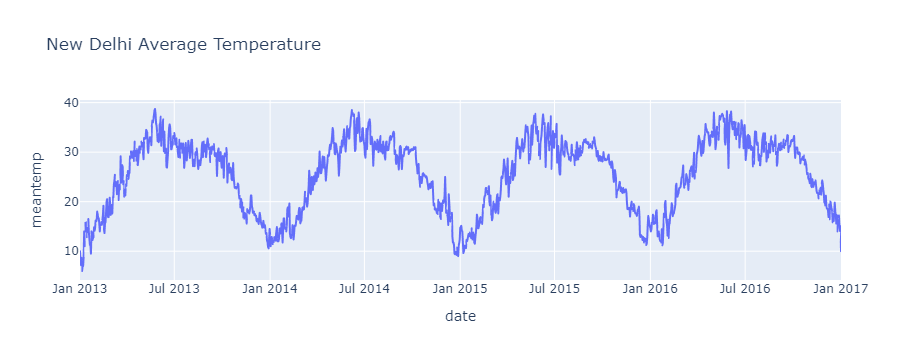

In [9]:
px.line(df, x="date", y="meantemp", title="New Delhi Average Temperature")

<Axes: >

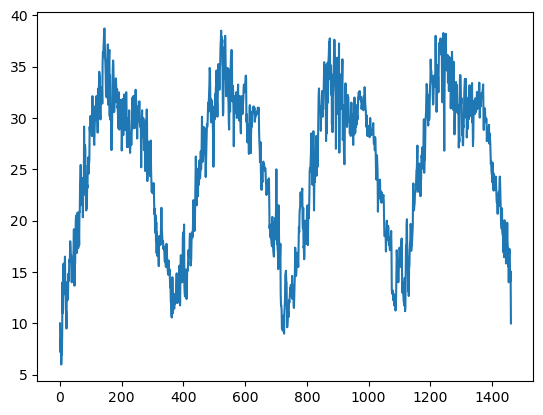

In [6]:
df.meantemp.plot()

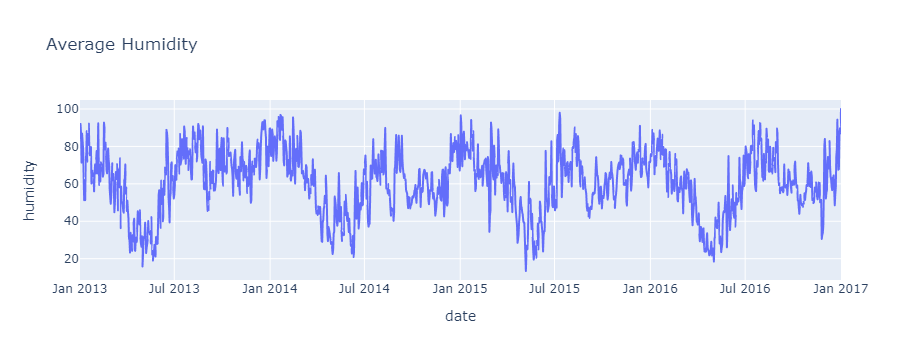

In [10]:
px.line(df, y="humidity", x="date", title="Average Humidity")

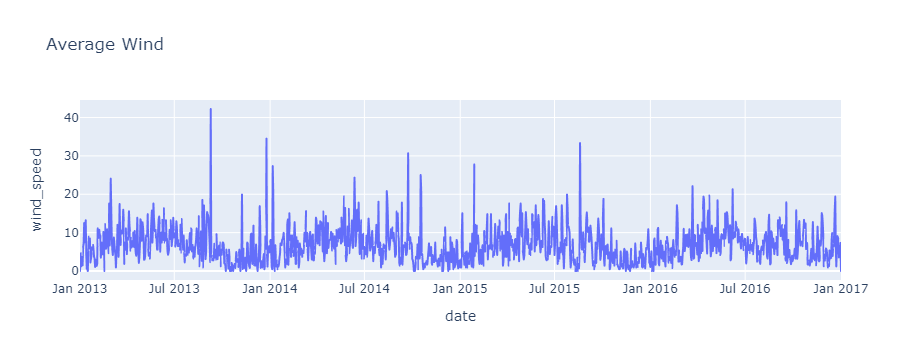

In [11]:
px.line(df, x="date",y="wind_speed", title="Average Wind")

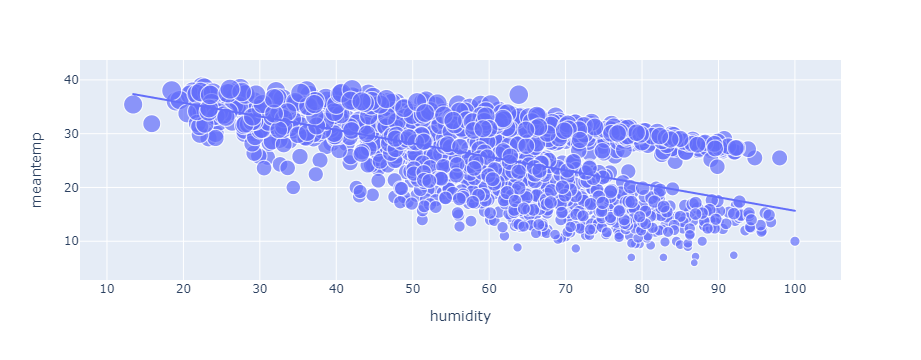

In [12]:
px.scatter(df, x="humidity", y="meantemp", size="meantemp", trendline="ols")

In [14]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")


In [16]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [17]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


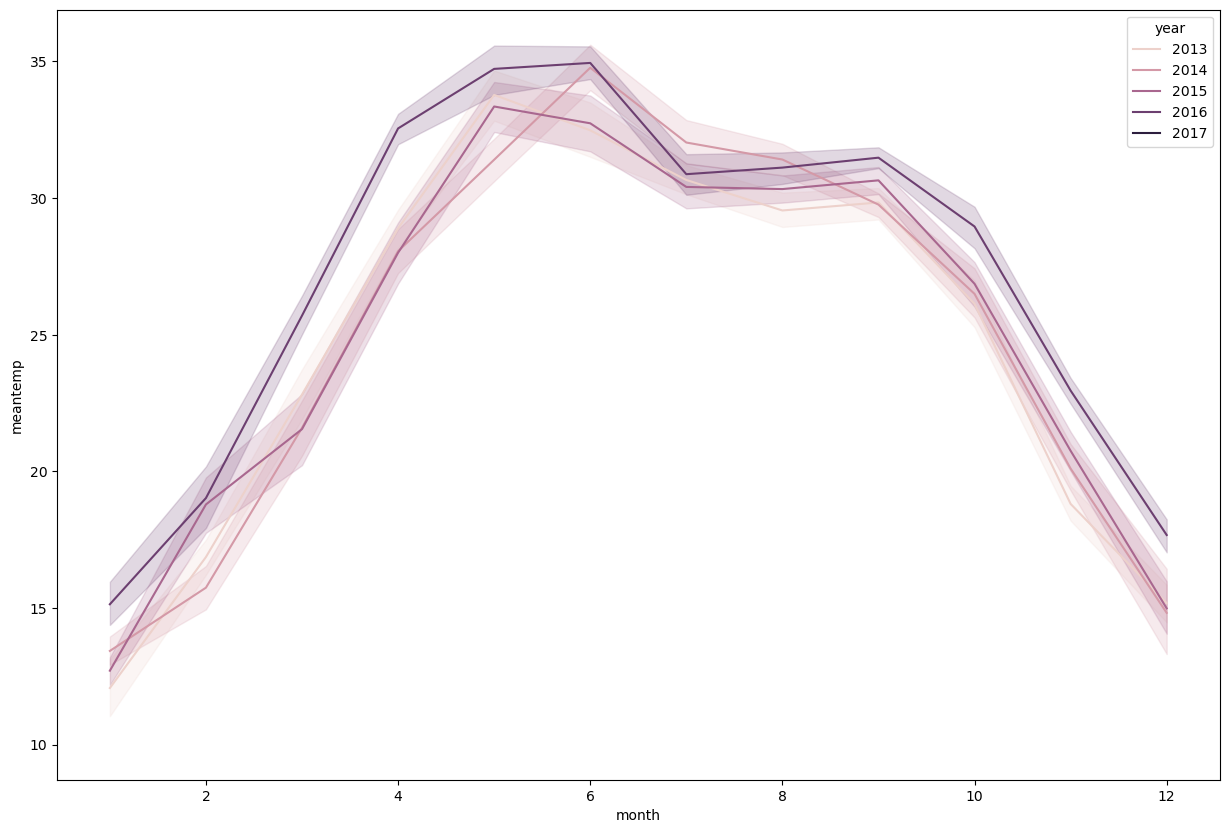

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x="month", y="meantemp", hue="year");

In [25]:
#pip install prophet

In [29]:
forecast_data= df.rename(columns = {"date":"ds","meantemp":"y"})

In [30]:
forecast_data

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:15 - cmdstanpy - INFO - Chain [1] done processing


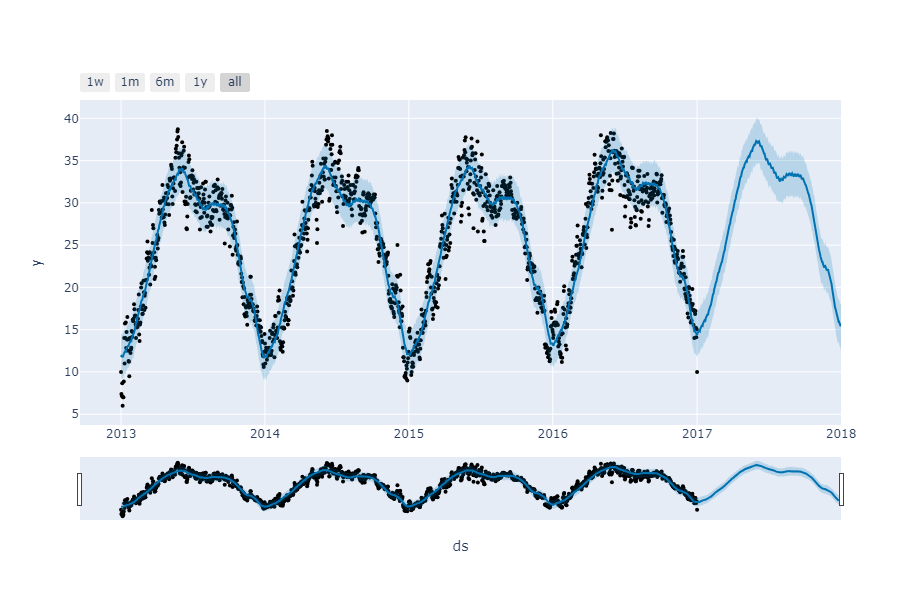

In [32]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)